In [1]:
from _params_models import rf_model_params


import io
import sys
import time
import pickle
import sympy as sp
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
from typing import Tuple
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV

In [3]:
# carregando dados
sleep1_dash = pd.read_csv("assets/data/part2/sleep_1/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep10_dash = pd.read_csv("assets/data/part2/sleep_10/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep05_dash = pd.read_csv("assets/data/part2/sleep_05/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep0_dash = pd.read_csv("assets/data/part2/sleep_0/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')

sleep1_int = pd.read_csv("assets/data/part2/sleep_1/data_int_.csv", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep10_int = pd.read_csv("assets/data/part2/sleep_10/data_int_.csv", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep05_int = pd.read_csv("assets/data/part2/sleep_05/data_int_.csv", delimiter=",",  header=None, skiprows=1, on_bad_lines='skip')
sleep0_int = pd.read_csv("assets/data/part2/sleep_0/data_int_.csv", delimiter=",",  header=None, skiprows=1, on_bad_lines='skip')

sleep1_int = remove_useless_attribute(sleep1_int).reset_index(drop=True)
sleep10_int = remove_useless_attribute(sleep10_int).reset_index(drop=True)
sleep05_int = remove_useless_attribute(sleep05_int).reset_index(drop=True)
sleep0_int = remove_useless_attribute(sleep0_int).reset_index(drop=True)

columns_name_int = ["timestamp","ingress_global_timestamp3","egress_global_timestamp3","enq_timestamp3","enq_qdepth3","deq_timedelta3","deq_qdepth3","ingress_global_timestamp2",	"egress_global_timestamp2",	"enq_timestamp2",	"enq_qdepth2",	"deq_timedelta2",	"deq_qdepth2",	"ingress_global_timestamp1",	"egress_global_timestamp1",	"enq_timestamp1",	"enq_qdepth1"	,"deq_timedelta1",	"deq_qdepth1"]
columns_name_dash = ["timestamp","inputBitrate","demuxBitrate","demuxCorrupted","demuxDiscontinuity","sendBitrate","framesDisplayed","playedAudioBuffers","decodedVideo","decodedAudio","framesDisplayedAux","playedAudioBuffersAux","decodedVideoAux","decodedAudioAux","framesDisplayedCalc","playedAudioBuffersCalc","decodedVideoCalc","decodedAudioCalc"]

sleep1_int.columns = columns_name_int
sleep10_int.columns = columns_name_int
sleep05_int.columns = columns_name_int
sleep0_int.columns = columns_name_int

sleep1_dash.columns = columns_name_dash
sleep10_dash.columns = columns_name_dash
sleep05_dash.columns = columns_name_dash
sleep0_dash.columns = columns_name_dash

In [4]:
sleep1_features, sleep1_labels = merge_datasert(sleep1_int, sleep1_dash)
sleep10_features, sleep10_labels = merge_datasert(sleep10_int, sleep10_dash)
sleep05_features, sleep05_labels = merge_datasert(sleep05_int, sleep05_dash)
sleep0_features, sleep0_labels = merge_datasert(sleep0_int, sleep0_dash)
print(sleep0_dash['framesDisplayedCalc'].max(),sleep0_dash['framesDisplayedCalc'].std())
print(sleep05_dash['framesDisplayedCalc'].max(),sleep05_dash['framesDisplayedCalc'].std())
print(sleep1_dash['framesDisplayedCalc'].max(),sleep1_dash['framesDisplayedCalc'].std())
print(sleep10_dash['framesDisplayedCalc'].max(),sleep10_dash['framesDisplayedCalc'].std())


91 4.184483039578966
34 3.6768955251092925
34 3.677055578963895
34 3.6454157709614545


In [5]:
best_params = rf_model_params(
    n_estimators=90,
    min_samples_split=5,
    min_samples_leaf=1,
    max_features='sqrt',
    max_depth=44,
    bootstrap=True,
    n_splits=5,
    random_state=42,
    shuffle=False,
    test_size=0.2,
    verbose = 0,
    n_jobs=2
)


start_time = time.time()
mae_sleep0, nmae_sleep0, model_sleep0 = default_random_forest_model(sleep0_features, sleep0_labels, best_params)
end_time = time.time()

elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
milliseconds = int((elapsed_time % 1) * 1000)
print(f"Sleep 0 -> MAE = {mae_sleep0:.5f}, NMAE = {nmae_sleep0 * 100:.2f}%, Tempo de treino: {minutes} minutos/{seconds} segundos/ {milliseconds} milissegundos")


start_time = time.time()
mae_sleep05, nmae_sleep05, model_sleep05 = default_random_forest_model(sleep05_features, sleep05_labels, best_params)
end_time = time.time()

elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
milliseconds = int((elapsed_time % 1) * 1000)
print(f"Sleep 0.5 -> MAE = {mae_sleep05:5.f}, NMAE = {nmae_sleep05 * 100:.2f}%, Tempo de treino: {minutes} minutos/{seconds} segundos/ {milliseconds} milissegundos")


start_time = time.time()
mae_sleep1, nmae_sleep1, model_sleep1 = default_random_forest_model(sleep1_features, sleep1_labels, best_params)
end_time = time.time()

elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
milliseconds = int((elapsed_time % 1) * 1000)

print(f"Sleep 1 -> MAE = {mae_sleep1:5.f}, NMAE = {nmae_sleep1 * 100:.2f}%, Tempo de treino: {minutes} minutos/{seconds} segundos/ {milliseconds} milissegundos")

start_time = time.time()
mae_sleep10, nmae_sleep10, model_sleep10 = default_random_forest_model(sleep10_features, sleep10_labels, best_params)
end_time = time.time()

elapsed_time = end_time - start_time
minutes = int(elapsed_time // 60)
seconds = int(elapsed_time % 60)
milliseconds = int((elapsed_time % 1) * 1000)
print(f"Sleep 10 -> MAE = {mae_sleep10:5.f}, NMAE = {nmae_sleep10 * 100:.2f}%, Tempo de treino: {minutes} minutos/{seconds} segundos/ {milliseconds} milissegundos")

Sleep 0 -> MAE = 2.81737, NMAE = 9.70%, Tempo de treino: 8 minutos/55 segundos/ 992 milissegundos


ValueError: Format specifier missing precision

Model Sleep0.5 - NMAE: 11.86%
Model Sleep1 - NMAE: 11.18%
Model Sleep10 - NMAE: 10.40%
Model No Sleep - NMAE: 3.45%


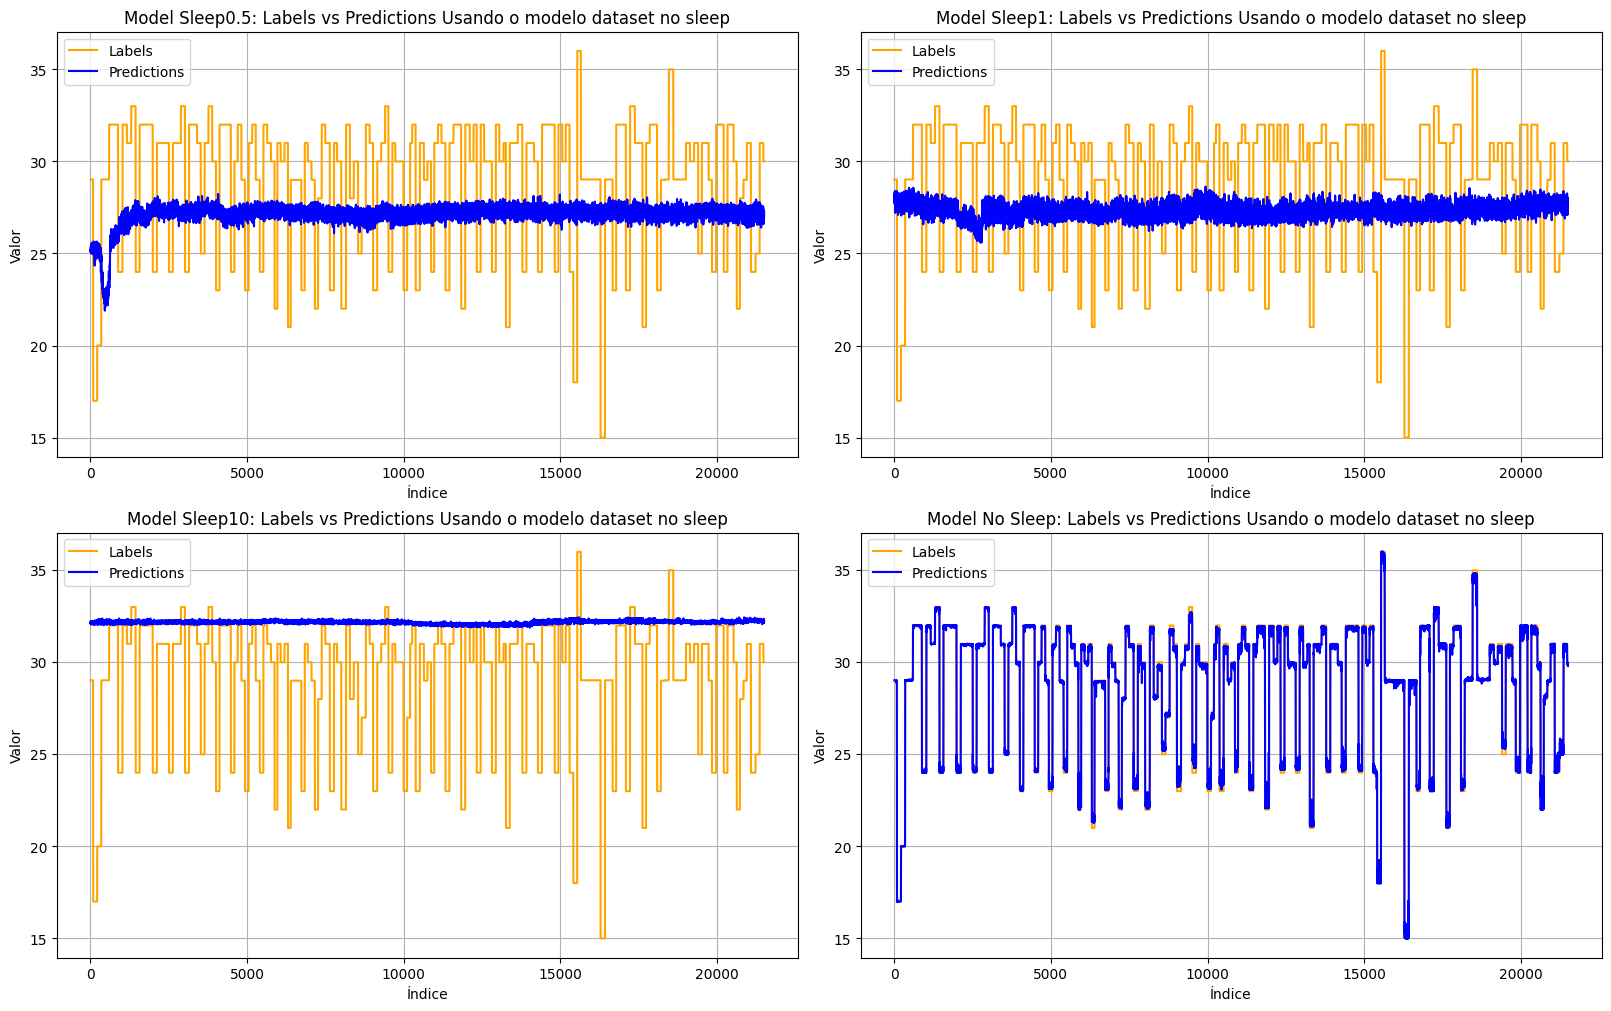

In [16]:
def evaluate_and_plot_combined(models, features, labels, start_idx, end_idx, titles, dataset_test):
    predictions = [model.predict(features) for model in models]
    
    nmae_values = [nmae(labels, pred) for pred in predictions]
    for title, nmae_value in zip(titles, nmae_values):
        print(f"{title} - NMAE: {nmae_value*100:.2f}%")
    
    fig, axs = plt.subplots(2, 2, figsize=(16, 10), constrained_layout=True)
    t = np.arange(start_idx, end_idx)

    for i, (ax, prediction, title) in enumerate(zip(axs.flatten(), predictions, titles)):
        ax.plot(t, labels[start_idx:end_idx], label='Labels', color='orange')
        ax.plot(t, prediction[start_idx:end_idx], label='Predictions', color='blue')
        ax.set_title(f'{title}: Labels vs Predictions Usando o modelo {dataset_test}')
        ax.set_xlabel('Índice')
        ax.set_ylabel('Valor')
        ax.grid(True)
        ax.legend()

    plt.show()

models = [model_sleep05, model_sleep1, model_sleep10, model_sleep0]
titles = ["Model Sleep0.5", "Model Sleep1", "Model Sleep10", "Model No Sleep"]

start_graph = 10
end_graph = 21500

evaluate_and_plot_combined(models, sleep05_features, sleep05_labels, start_graph, end_graph, titles,'dataset 0.5')


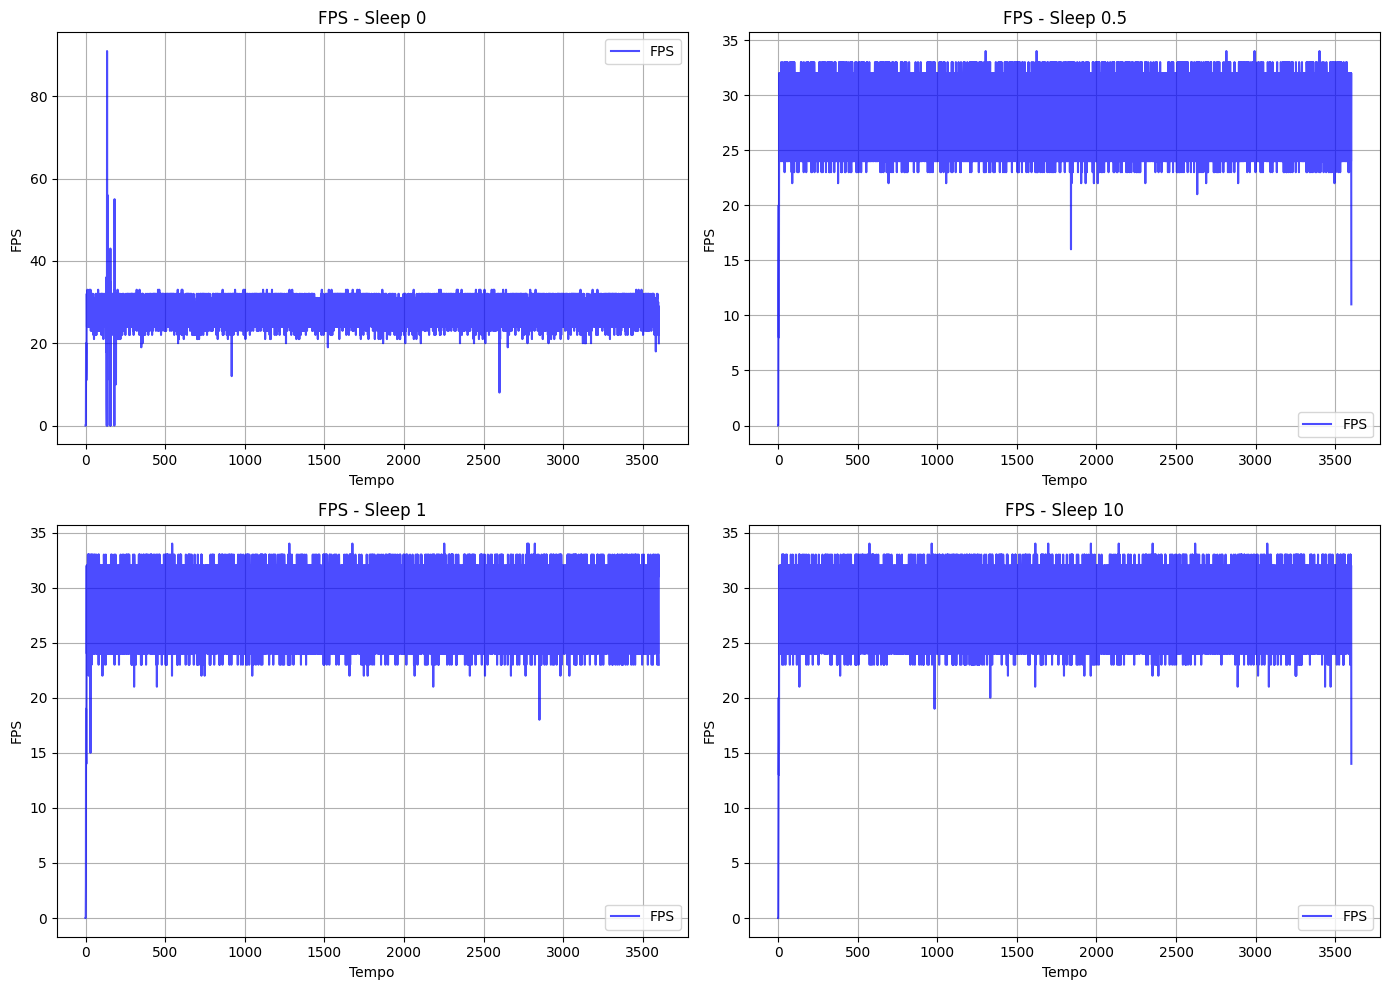

In [35]:
def show_fps_subplots(data_dict, rows=2, cols=2):
    fig, axs = plt.subplots(rows, cols, figsize=(14, 10))
    axs = axs.flatten() 
    for ax, (label, data) in zip(axs, data_dict.items()):
        ax.plot(data, label='FPS', color='blue', alpha=0.7)
        ax.set_title(f"FPS - {label}")
        ax.set_xlabel("Tempo")
        ax.set_ylabel("FPS")
        ax.grid(True)
        ax.legend()
    
    plt.tight_layout()
    plt.show()
sleep1_dash = pd.read_csv("assets/data/part2/sleep_1/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep10_dash = pd.read_csv("assets/data/part2/sleep_10/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep05_dash = pd.read_csv("assets/data/part2/sleep_05/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
sleep0_dash = pd.read_csv("assets/data/part2/sleep_0/data_dash.log", delimiter=",", header=None, skiprows=1, on_bad_lines='skip')
# dar nomes aos bois
columns_name_dash = [
    "timestamp", "inputBitrate", "demuxBitrate", "demuxCorrupted", "demuxDiscontinuity", "sendBitrate",
    "framesDisplayed", "playedAudioBuffers", "decodedVideo", "decodedAudio", "framesDisplayedAux",
    "playedAudioBuffersAux", "decodedVideoAux", "decodedAudioAux", "framesDisplayedCalc",
    "playedAudioBuffersCalc", "decodedVideoCalc", "decodedAudioCalc"
]
sleep1_dash.columns = columns_name_dash
sleep10_dash.columns = columns_name_dash
sleep05_dash.columns = columns_name_dash
sleep0_dash.columns = columns_name_dash
fps_data = {
    "Sleep 0": sleep0_dash['framesDisplayedCalc'],
    "Sleep 0.5": sleep05_dash['framesDisplayedCalc'],
    "Sleep 1": sleep1_dash['framesDisplayedCalc'],
    "Sleep 10": sleep10_dash['framesDisplayedCalc']
}
show_fps_subplots(fps_data)


In [ ]:
data_log